# Market Segmentation with Clustering - Lab

## Introduction

In this lab, you'll use your knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

In this lab you will: 

- Use clustering to create and interpret market segmentation on real-world data 

## Getting Started

In this lab, you're going to work with the [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) from the UCI Machine Learning datasets repository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from supervised learning and store these labels separately, so that we can use them afterward to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import `pandas`, `numpy`, and `matplotlib.pyplot`, and set the standard alias for each. 
* Use `numpy` to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(seed=0)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Now, let's load our data and inspect it. You'll find the data stored in `'wholesale_customers_data.csv'`. 

In the cell below, load the data into a DataFrame and then display the first five rows to ensure everything loaded correctly.

In [3]:
raw_df = pd.read_csv('wholesale_customers_data.csv')
raw_df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [4]:
raw_df.shape

(440, 8)

Now, let's go ahead and store the `'Channel'` column in a separate variable and then drop both the `'Channel'` and `'Region'` columns. Then, display the first five rows of the new DataFrame to ensure everything worked correctly. 

In [8]:
channels = raw_df['Channel']
df = raw_df.drop(['Channel', 'Region'], axis = 1 )

Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit it to the data (`df`) 
* Get the predictions from the clustering algorithm and store them in `cluster_preds` 

In [10]:
k_means = KMeans()
k_means.fit(df)
cluster_preds = k_means.predict(df)

Now, use some of the metrics to check the performance. You'll use `calinski_harabasz_score()` and `adjusted_rand_score()`, which can both be found inside `sklearn.metrics.cluster`. 

In the cell below, import these scoring functions. 

In [12]:
from sklearn.metrics.cluster import calinski_harabasz_score, adjusted_rand_score

Now, start with CH score to get the variance ratio. 

In [13]:
calinski_harabasz_score(df, channels)

87.53467078529049

Although you don't have any other numbers to compare this to, this is a pretty low score, suggesting that the clusters aren't great. 

Since you actually have ground-truth labels, in this case you can use `adjusted_rand_score()` to check how well the clustering performed. Adjusted Rand score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar the predicted clusters are to the actual channels. 

Adjusted Rand score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score()` and pass in `channels` and `cluster_preds` to see how well your first iteration of clustering performed. 

In [22]:
adjusted_rand_score(channels, cluster_preds)

0.21983331011500093

According to these results, the clusterings were essentially no better than random chance. Let's see if you can improve this. 

### Scaling our dataset

Recall that k-means clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use `StandardScaler` to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import and instantiate [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and use it to transform the dataset  
* Instantiate and fit k-means to this scaled data, and then use it to predict clusters 
* Calculate the adjusted Rand score for these new predictions 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [20]:
scaled_k_means = KMeans()
scaled_k_means.fit(scaled_df)
scaled_preds = scaled_k_means.predict(scaled_df)

In [23]:
calinski_harabasz_score(scaled_df, channels)

93.98377755261515

In [21]:
adjusted_rand_score(channels, scaled_preds)

0.3219434602357454

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the greater the total area that we have to worry about our clusters existing in. Let's try using Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've already seen PCA in a previous section, we will let you figure this out by yourself. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn 
* Create a `PCA` instance and use it to transform our scaled data  
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information 
* Create a new `KMeans` object, fit it to our PCA-transformed data, and check the adjusted Rand score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible adjusted Rand score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()

princ_comp = pca.fit_transform(scaled_df)

In [27]:
princ_comp.shape

(440, 6)

In [28]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

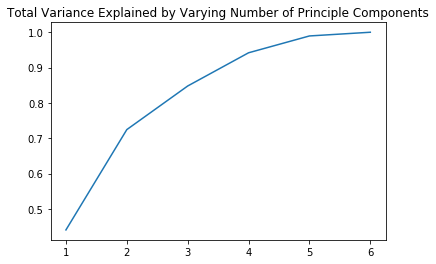

In [29]:
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components');

In [31]:
var = 0
increm = 0
while var < .90:
    var += pca.explained_variance_ratio_[increm]
    increm += 1
print(var)
print(increm - 1)

0.9418920905750295
3


In [33]:
pca_3 = PCA(n_components = 3)

principalComponents_3 = pca_3.fit_transform(scaled_df)

pca_3_k_means = KMeans()
pca_3_k_means.fit(principalComponents_3)
pca_3_preds = pca_3_k_means.predict(principalComponents_3)

In [38]:
adjusted_rand_score(channels, pca_3_preds)

0.2586088261442946

In [35]:
pca_4 = PCA(n_components = 4)

principalComponents_4 = pca_4.fit_transform(scaled_df)

pca_4_k_means = KMeans()
pca_4_k_means.fit(principalComponents_4)
pca_4_preds = pca_4_k_means.predict(principalComponents_4)

In [37]:
adjusted_rand_score(channels, pca_4_preds)

0.2852614233692585

**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many principal components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_______________________________________________________________________________________________________________________________

## Optional (Level up) 

### Hierarchical Agglomerative Clustering

Now that we've tried doing market segmentation with k-means clustering, let's end this lab by trying with HAC!

In the cells below, use [Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to make cluster predictions on the datasets we've created and see how HAC's performance compares to k-mean's performance. 

**_NOTE_**: Don't just try HAC on the PCA-transformed dataset -- also compare algorithm performance on the scaled and unscaled datasets, as well! 

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
df.shape

(440, 6)

In [45]:
scaled_df.shape

(440, 6)

In [47]:
principalComponents_3.shape

(440, 3)

In [48]:
principalComponents_4.shape

(440, 4)

In [54]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=6)

as_comp = agg_comp.fit_predict(df)
labels_comp = agg_comp.labels_
print('HAC (Complete) Rand score: ', adjusted_rand_score(labels_comp, channels))
as_avg = agg_avg.fit_predict(df)
labels_avg = agg_avg.labels_
print('HAC (Average) Rand score: ', adjusted_rand_score(labels_avg, channels))
as_ward = agg_ward.fit_predict(df)
labels_ward = agg_ward.labels_
print('HAC (Ward) Rand score: ', adjusted_rand_score(labels_ward, channels))

HAC (Complete) Rand score:  0.27003381177444363
HAC (Average) Rand score:  0.017604101668634606
HAC (Average) Rand score:  0.25911054748543755


In [67]:
def calc_rand(df, clusters):
    print('Number of clusters:', clusters)
    agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=clusters)
    agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=clusters)
    agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=clusters)

    as_comp = agg_comp.fit_predict(df)
    labels_comp = agg_comp.labels_
    print('HAC (Complete) Rand score: ', round(adjusted_rand_score(labels_comp, channels), 4))
    as_avg = agg_avg.fit_predict(df)
    labels_avg = agg_avg.labels_
    print('HAC (Average) Rand score: ', round(adjusted_rand_score(labels_avg, channels), 4))
    as_ward = agg_ward.fit_predict(df)
    labels_ward = agg_ward.labels_
    print('HAC (Ward) Rand score: ', round(adjusted_rand_score(labels_ward, channels), 4))

In [69]:
print('Using original dataframe')
for num_clusters in range(2, 11):
    calc_rand(df, num_clusters)

Using original dataframe
Number of clusters: 2
HAC (Complete) Rand score:  -0.007
HAC (Average) Rand score:  -0.0024
HAC (Ward) Rand score:  -0.0192
Number of clusters: 3
HAC (Complete) Rand score:  0.0228
HAC (Average) Rand score:  0.0227
HAC (Ward) Rand score:  0.1152
Number of clusters: 4
HAC (Complete) Rand score:  0.0155
HAC (Average) Rand score:  0.0177
HAC (Ward) Rand score:  0.0942
Number of clusters: 5
HAC (Complete) Rand score:  0.0154
HAC (Average) Rand score:  0.0176
HAC (Ward) Rand score:  0.0906
Number of clusters: 6
HAC (Complete) Rand score:  0.27
HAC (Average) Rand score:  0.0176
HAC (Ward) Rand score:  0.2591
Number of clusters: 7
HAC (Complete) Rand score:  0.27
HAC (Average) Rand score:  0.0176
HAC (Ward) Rand score:  0.2583
Number of clusters: 8
HAC (Complete) Rand score:  0.172
HAC (Average) Rand score:  0.0225
HAC (Ward) Rand score:  0.2582
Number of clusters: 9
HAC (Complete) Rand score:  0.172
HAC (Average) Rand score:  0.0225
HAC (Ward) Rand score:  0.2581
Num

In [70]:
print('Using scaled dataframe')
for num_clusters in range(2, 11):
    calc_rand(scaled_df, num_clusters)

Using scaled dataframe
Number of clusters: 2
HAC (Complete) Rand score:  -0.0024
HAC (Average) Rand score:  -0.0024
HAC (Ward) Rand score:  0.0226
Number of clusters: 3
HAC (Complete) Rand score:  0.0485
HAC (Average) Rand score:  0.0227
HAC (Ward) Rand score:  0.4856
Number of clusters: 4
HAC (Complete) Rand score:  0.0432
HAC (Average) Rand score:  0.0177
HAC (Ward) Rand score:  0.4858
Number of clusters: 5
HAC (Complete) Rand score:  0.0407
HAC (Average) Rand score:  0.0153
HAC (Ward) Rand score:  0.298
Number of clusters: 6
HAC (Complete) Rand score:  0.0403
HAC (Average) Rand score:  0.0152
HAC (Ward) Rand score:  0.2795
Number of clusters: 7
HAC (Complete) Rand score:  0.0401
HAC (Average) Rand score:  0.0152
HAC (Ward) Rand score:  0.2775
Number of clusters: 8
HAC (Complete) Rand score:  0.0111
HAC (Average) Rand score:  0.0151
HAC (Ward) Rand score:  0.269
Number of clusters: 9
HAC (Complete) Rand score:  0.0108
HAC (Average) Rand score:  0.0151
HAC (Ward) Rand score:  0.2603
N

In [72]:
print('Using PCA with 3 components on scaled dataframe')
for num_clusters in range(2, 11):
    calc_rand(principalComponents_3, num_clusters)

Using PCA with 3 components on scaled dataframe
Number of clusters: 2
HAC (Complete) Rand score:  -0.0024
HAC (Average) Rand score:  -0.0024
HAC (Ward) Rand score:  0.0276
Number of clusters: 3
HAC (Complete) Rand score:  0.1763
HAC (Average) Rand score:  0.0227
HAC (Ward) Rand score:  0.533
Number of clusters: 4
HAC (Complete) Rand score:  0.1739
HAC (Average) Rand score:  0.0177
HAC (Ward) Rand score:  0.5332
Number of clusters: 5
HAC (Complete) Rand score:  0.1725
HAC (Average) Rand score:  0.0177
HAC (Ward) Rand score:  0.3199
Number of clusters: 6
HAC (Complete) Rand score:  0.1725
HAC (Average) Rand score:  0.0153
HAC (Ward) Rand score:  0.3099
Number of clusters: 7
HAC (Complete) Rand score:  0.1234
HAC (Average) Rand score:  0.0152
HAC (Ward) Rand score:  0.2928
Number of clusters: 8
HAC (Complete) Rand score:  0.1224
HAC (Average) Rand score:  0.0037
HAC (Ward) Rand score:  0.2925
Number of clusters: 9
HAC (Complete) Rand score:  0.1211
HAC (Average) Rand score:  0.0878
HAC (W

In [73]:
print('Using PCA with 4 components on scaled dataframe')
for num_clusters in range(2, 11):
    calc_rand(principalComponents_4, num_clusters)

Using PCA with 4 components on scaled dataframe
Number of clusters: 2
HAC (Complete) Rand score:  -0.0024
HAC (Average) Rand score:  -0.0024
HAC (Ward) Rand score:  0.0482
Number of clusters: 3
HAC (Complete) Rand score:  0.1763
HAC (Average) Rand score:  0.0227
HAC (Ward) Rand score:  0.5264
Number of clusters: 4
HAC (Complete) Rand score:  0.1697
HAC (Average) Rand score:  0.0177
HAC (Ward) Rand score:  0.5267
Number of clusters: 5
HAC (Complete) Rand score:  0.1673
HAC (Average) Rand score:  0.0153
HAC (Ward) Rand score:  0.3337
Number of clusters: 6
HAC (Complete) Rand score:  0.1486
HAC (Average) Rand score:  0.0153
HAC (Ward) Rand score:  0.3317
Number of clusters: 7
HAC (Complete) Rand score:  0.1474
HAC (Average) Rand score:  0.0153
HAC (Ward) Rand score:  0.3112
Number of clusters: 8
HAC (Complete) Rand score:  0.1463
HAC (Average) Rand score:  0.0152
HAC (Ward) Rand score:  0.2989
Number of clusters: 9
HAC (Complete) Rand score:  0.1462
HAC (Average) Rand score:  0.0037
HAC (

In [ ]:
# Winner! HAC using ward linkage and four clusters, using a PCA selection of the top three principal components, on a scaled dataframe

## Summary

In this lab, you used your knowledge of clustering to perform a market segmentation on a real-world dataset. You started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!